# 1. 

In [1]:
from google.colab import drive
drive.mount('./gdrive')

In [2]:
# %cd /content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료

/content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료


In [5]:
!ls -al /content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료/darknet

total 242203
-rw------- 1 root root      8342 Jun 18  2021 yolov3.cfg
-rw------- 1 root root 248007048 Jan  7 05:58 yolov3.weights


In [4]:
weight_file = '/content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료/darknet/yolov3.weights'
cfg_file = '/content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료/darknet/yolov3.cfg'
name_file = '/content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료/data/coco.names'

# 2. Load file

In [6]:
# 2. Load file
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np

In [7]:
min_confidence = 0.5
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [8]:
net

<dnn_Net 0x7f0581340e30>

In [10]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0,255, size= (len(classes),3))

In [11]:
from google.colab import files
files.upload()

Saving car1.jpg to car1.jpg


{'car1.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x10\x10\x13\x10\x13\x16\x16\x16\x16\x16\x16\x1a\x18\x1a\x1b\x1b\x1b\x1a\x1a\x1a\x1a\x1b\x1b\x1b\x1d\x1d\x1d"""\x1d\x1d\x1d\x1b\x1b\x1d\x1d  ""%&%##"#&&(((00..88:EES\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7

In [12]:
!ls -al /content/drive/MyDrive/석사과정/dacon/농업환경[LG]/참고자료

total 18823
-rw------- 1 root root    77963 Jan  7 06:25 car1.jpg
-rw------- 1 root root   273118 Jan  7 04:01 cv2익숙해지기.ipynb
drwx------ 2 root root     4096 Jan  7 06:11 darknet
drwx------ 2 root root     4096 Jan  7 06:12 data
-rw------- 1 root root    13448 Jan  7 03:33 Haar-cascade-video-clip.ipynb
-rw------- 1 root root   279558 Jan  6 08:42 Harr-cascade.ipynb
-rw------- 1 root root   138374 Jan  7 04:43 openCVdnn.ipynb
-rw------- 1 root root    14047 Jan  7 05:24 openCVdnnVideo.ipynb
-rw------- 1 root root  6877251 Jan  6 07:24 opencv_filter.ipynb
-rw------- 1 root root 11297713 Jan  6 06:00 open_cv.ipynb
-rw------- 1 root root   291793 Jan  7 06:26 YOLO.ipynb


In [47]:
img = cv2.imread('car1.jpg')
height, width 

(1280, 720)

In [48]:
# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop = False)

net.setInput(blob)
outs = net.forward(output_layers)

0 car
1 truck
2 car
3 car
4 traffic light
5 car
6 truck
7 truck


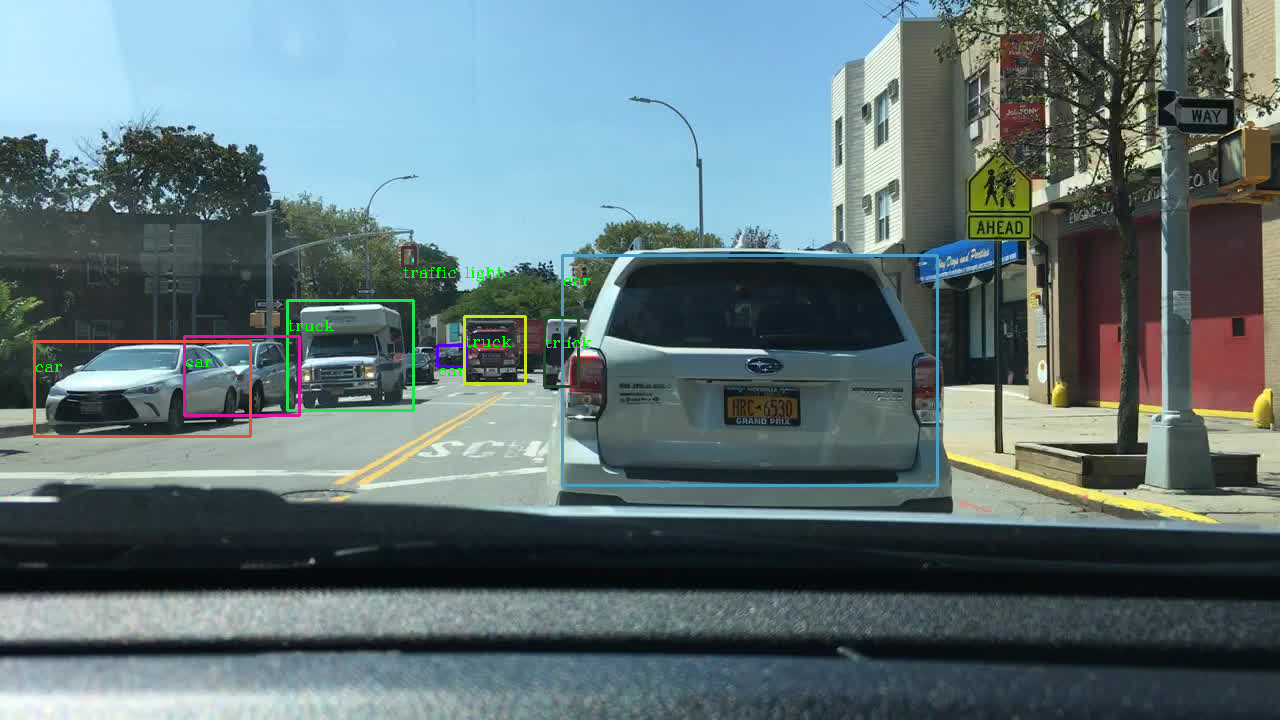

In [49]:
class_ids = []
confidences = []
boxes = []
height, width = img.shape[:2]

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
# 같은 물체인데도 box가 여러개 나옴.
# IoU: Intersectoin over Union
# Box간 겹치는 부분이 많으면 (nms_threshold 이상...)
# 겹치는 부분이 가장 많은 하나의 box index를 리턴함.
# min_confidence
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, nms_threshold= 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x,y+30), font, 0.5, (0,255,0), 1)

cv2_imshow(img)